# Personal Energy Usage 
<hr/>
Objective: 
<hr/>

(work in Progress) 

(There is only 5 data points for now, 
Once there is more data with full year, will remove seasonality.) 



In [42]:
# Libraries

import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns


import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


In [50]:
# import data 

df = pd.read_csv('../data/clean_df.csv')
print(df.shape)
df.head()

(5, 5)


,date,gal,cost per gal,avg_temp,days
0,2020-10-02,55.3,1.99,61.45,12
1,2020-11-25,103.5,3.09,46.92,54
2,2020-12-26,100.0,1.99,32.06,31
3,2021-01-20,109.4,1.99,26.79,25
4,2021-02-17,100.0,1.99,18.09,28


In [51]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
# Contents

df

,date,gal,cost per gal,avg_temp,days
0,2020-10-02,55.3,1.99,61.45,12
1,2020-11-25,103.5,3.09,46.92,54
2,2020-12-26,100.0,1.99,32.06,31
3,2021-01-20,109.4,1.99,26.79,25
4,2021-02-17,100.0,1.99,18.09,28


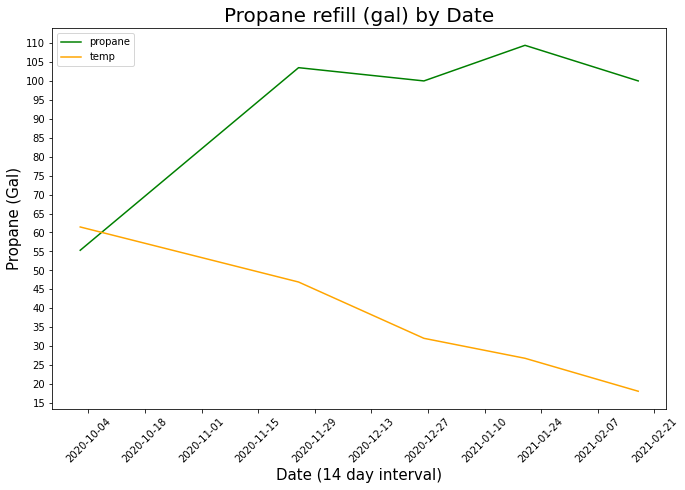

In [53]:
# Visualization 

plt.figure(figsize = (11,7))
ax = sns.lineplot(data = df, x = 'date', 
                  color = 'green',
                  label = 'propane',
                  y = 'gal')

ax = sns.lineplot(data = df, x = 'date', 
                  color = 'orange',
                  label = 'temp',
                  y = 'avg_temp')

# x & y labels
plt.title('Propane refill (gal) by Date', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Propane (Gal)', size = 15)



# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);


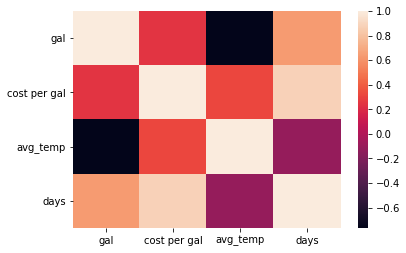

In [54]:
## Correlation Matric 

sns.heatmap(df.corr());

In [49]:
df

,date,gal,cost per gal,avg_temp
0,2020-10-02,55.3,1.99,61.45
1,2020-11-25,103.5,3.09,46.92
2,2020-12-26,100.0,1.99,32.06
3,2021-01-20,109.4,1.99,26.79
4,2021-02-17,100.0,1.99,18.09


In [ ]:
# look to remove seasonality 

# Linear Regression

In [58]:
X = df.drop(['date','cost per gal','gal'], axis = 1)
X

,avg_temp,days
0,61.45,12
1,46.92,54
2,32.06,31
3,26.79,25
4,18.09,28


In [59]:
y = df['gal']
y

0     55.3
1    103.5
2    100.0
3    109.4
4    100.0
Name: gal, dtype: float64

In [63]:
# split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [64]:
X_train

,avg_temp,days
4,18.09,28
0,61.45,12
2,32.06,31


In [69]:
# linear Regression FIT

lr = LinearRegression().fit(X_train, y_train)

In [66]:
# test score

lr.score(X_test, y_test)

-74.5563483901943

In [67]:
# train score

lr.score(X_train, y_train)

1.0

In [68]:
lr.coef_

array([-0.37924208,  1.76600396])

In [70]:
lr.intercept_

57.41237839366515

In [74]:
lr.predict(X_test)

array([134.98255373,  91.40258201])